In [1]:
# Feature extraction example
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [2]:
# Load the example clip
y, sr = librosa.load("/Users/spacecoffin/Dropbox/School/IS/12_13/aif_files/ce9afe64b036aac1c5ee351a6e17a03a.aiff")

In [3]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# And the first-order & second-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

/Users/spacecoffin/Development/sprbrg/lib/python3.5/site-packages/numpy/core/numeric.py:482: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return array(a, dtype, copy=False, order=order)


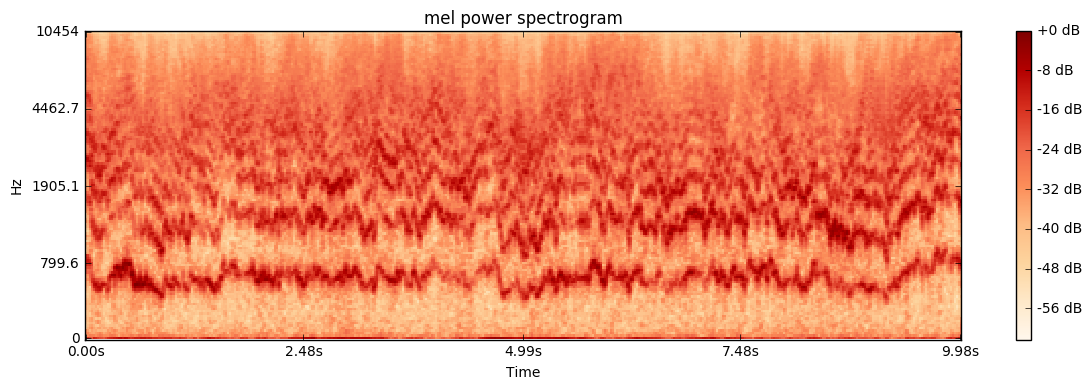

In [4]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

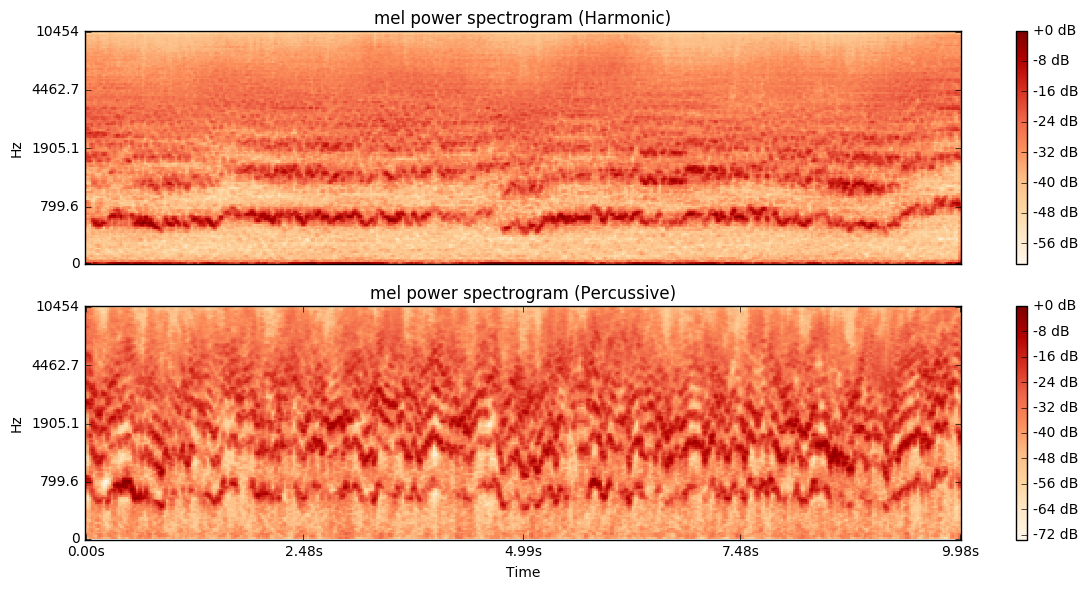

In [5]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

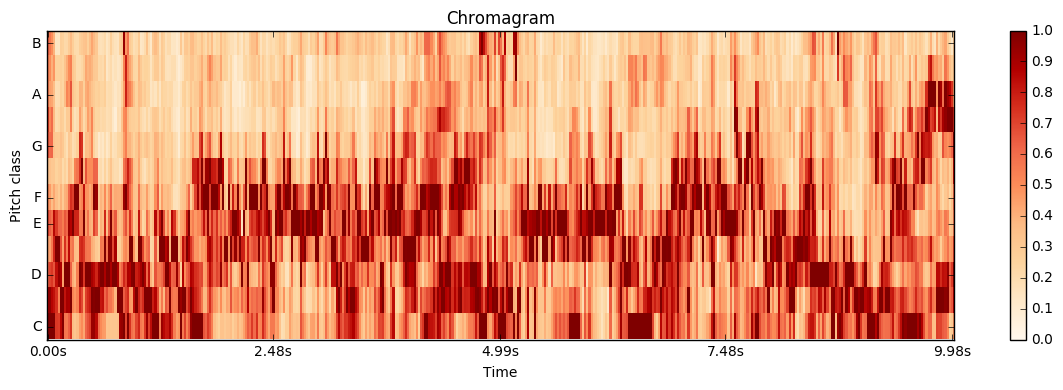

In [6]:
# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(chromagram, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

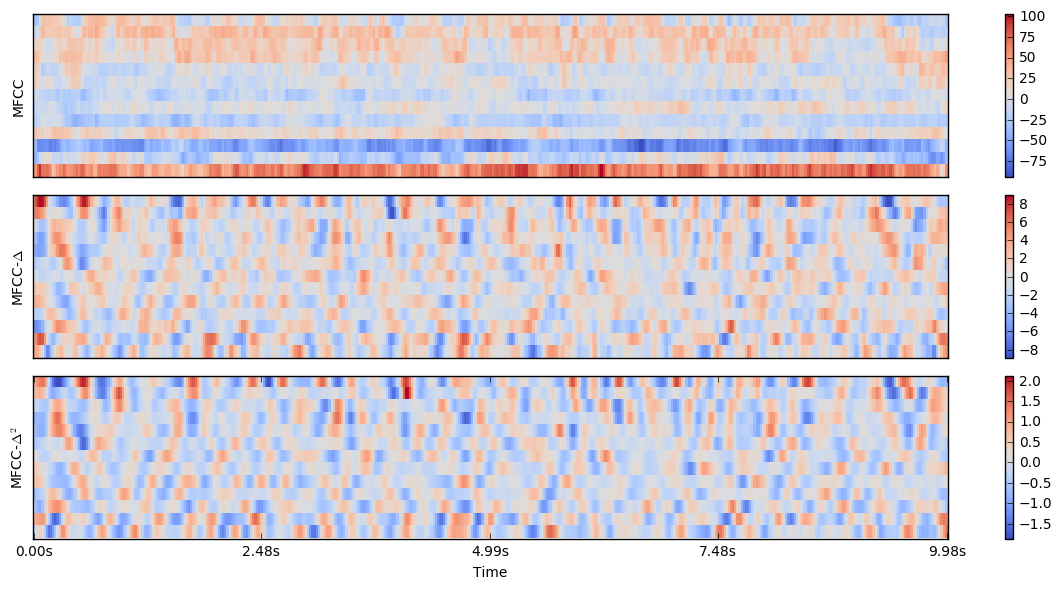

In [7]:
# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(mfcc_delta)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(mfcc_delta2, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, mfcc_delta, mfcc_delta2])

In [8]:
M.shape

(39, 431)

In [9]:
mfcc.shape

(13, 431)

In [10]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

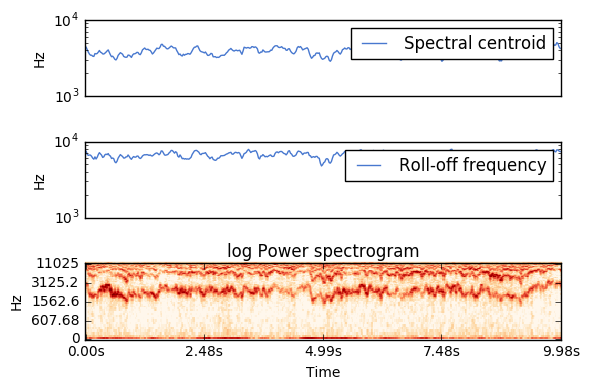

In [11]:
plt.figure(figsize=(10, 20))

f, (ax1, ax2, ax3) = plt.subplots(3)

# Plot spectral centroid
#plt.subplot(2, 1, 1)
ax1.semilogy(cent.T, label='Spectral centroid')
ax1.set_ylabel('Hz')
ax1.set_xticks([])
ax1.set_xlim([0, cent.shape[-1]])
ax1.legend()

# Plot roll-off frequency
#plt.subplot(2, 1, 2)
ax2.semilogy(rolloff.T, label='Roll-off frequency')
ax2.set_ylabel('Hz')
ax2.set_xticks([])
ax2.set_xlim([0, rolloff.shape[-1]])
ax2.legend()

#plt.subplot(2, 1, 3)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max),
                         y_axis='log', x_axis='time')
ax3.set_title('log Power spectrogram')
plt.tight_layout()

In [12]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

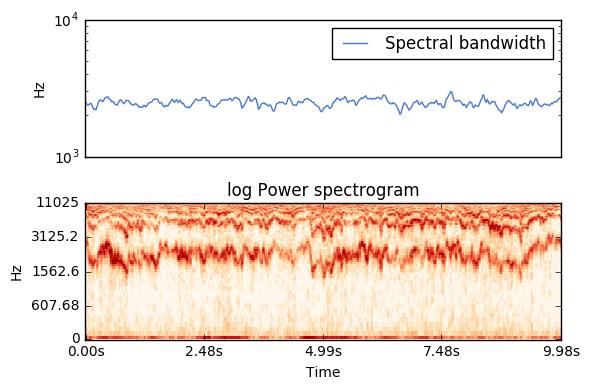

In [13]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max),
                         y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

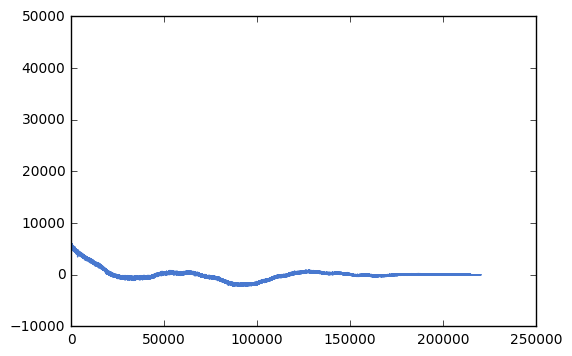

In [14]:
plt.plot(librosa.autocorrelate(y))

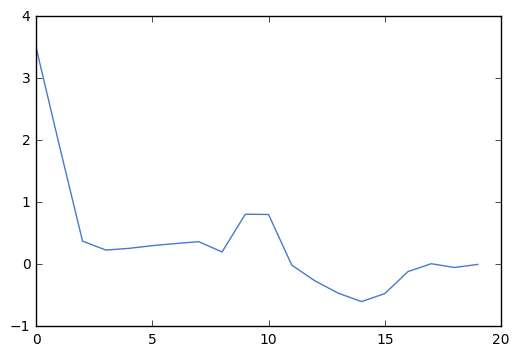

In [18]:
plt.plot(librosa.autocorrelate(y[:20]))

In [17]:
librosa.autocorrelate(y[:20]).shape

(20,)